In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew
from wordcloud import WordCloud, STOPWORDS
from wordcloud import ImageColorGenerator
import plotly.io as pio
pio.templates.default = "plotly_white"

In [2]:
ODI = pd.read_csv('ODI-2021.csv')

In [3]:
ODI.columns=['time','programme','ML','IR','ST','DB','gender','chocolate','birthday','neighbour','standup','stress','competition','random','bedtime','good1','good2']

In [4]:
ODI['programme']=ODI['programme'].apply(lambda x:x.split())

In [5]:
w={'artificial':'AI','Artificial':'AI','AI':'AI','ai':'AI','Ai':'AI','AI,':'AI','AI:':'AI',
'Computational':'CLS','CLS':'CLS','computational':'CLS',
'Computer':'CS','computer':'CS','cs':'CS','CS':'CS','Data':'CS','data':'CS',
'Finance':'Finance','Quantitative':'Finance','quantitative':'Finance','finance':'Finance','QRM':'Finance','qrm':'Finance','Risk':'Finance','risk':'Finance',
'Bioinformatics':'Bioinformatics','bioinformatics':'Bioinformatics','Bioinfromatics':'Bioinformatics',
'Econometrics':'Econometrics','econometrics':'Econometrics',
'Information':'Information','information':'Information',
'Business':'BA','business':'BA','BA':'BA',
'Python':'wrong','https://forms.gle/eTy4nEs3khRqPtMLA':'wrong','zusje':'wrong'}
hlist=['AI','BA','CS','CLS','Econometrics','Finance','Bioinformatics','Information','wrong']

In [6]:
for k,i in enumerate(ODI['programme']):
    for j in ODI['programme'][k]:
        if j in w:
            ODI['programme'][k]=w[j]
            break 

In [7]:
ODI.programme.value_counts()

AI                                                                                      87
BA                                                                                      37
CLS                                                                                     34
Bioinformatics                                                                          32
Econometrics                                                                            31
CS                                                                                      29
Finance                                                                                 25
Information                                                                              8
[Mathematics]                                                                            3
wrong                                                                                    3
[Fintech]                                                                                2

In [8]:
for k,i in enumerate(ODI['programme']):
    if i not in hlist:
        ODI['programme'][k]='others'

In [9]:
ODI.programme.value_counts()

AI                87
BA                37
CLS               34
Bioinformatics    32
Econometrics      31
CS                29
others            27
Finance           25
Information        8
wrong              3
Name: programme, dtype: int64

([<matplotlib.patches.Wedge at 0x7fd1b0b6ab50>,
 [Text(0.6994470754900718, 0.8489839742824278, 'AI'),
  Text(-0.59129070363693, 0.927564177721706, 'BA'),
  Text(-1.056011500948191, 0.30796056543841593, 'CLS'),
  Text(-1.0194376047186868, -0.41321540397887724, 'Bioinformatics'),
  Text(-0.5723703745164346, -0.9393573092151446, 'Econometrics'),
  Text(0.06684430094155076, -1.0979671395044732, 'CS'),
  Text(0.6465637650236896, -0.8899187028927931, 'others'),
  Text(1.0064056331658116, -0.4440131772054993, 'Finance'),
  Text(1.0963868874522054, -0.08908306810424574, 'Information')],
 [Text(0.3815165866309482, 0.4630821677904151, '28.06%'),
  Text(-0.32252220198377995, 0.5059440969391124, '11.94%'),
  Text(-0.5760062732444677, 0.16797849023913594, '10.97%'),
  Text(-0.5560568753011018, -0.22539022035211484, '10.32%'),
  Text(-0.3122020224635097, -0.5123767141173515, '10.00%'),
  Text(0.03646052778630041, -0.5988911670024399, '9.35%'),
  Text(0.3526711445583761, -0.48541020157788706, '8.71%'

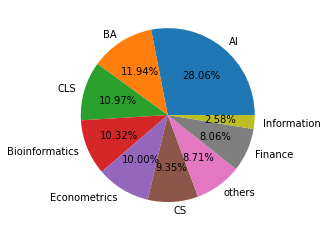

In [10]:
plt.pie(ODI[~ODI.programme.str.contains("wrong",na=False)].programme.value_counts(), labels=ODI[~ODI.programme.str.contains("wrong",na=False)].programme.value_counts().index,autopct='%1.2f%%')

In [11]:
ODI['ML'] = ODI['ML'].map({'yes':1, 'no':0,'unknown':2})
ODI['ST'] = ODI['ST'].map({'mu':1, 'sigma':0,'unknown':2})
ODI['IR'] = ODI['IR'].map({'1':1,'0':0,'unknown':2})
ODI['DB'] = ODI['DB'].map({'ja':1, 'nee':0,'unknown':2})

In [12]:
yeslist=[ODI.ML.value_counts('1')[1],ODI.ST.value_counts('1')[1],ODI.IR.value_counts('1')[1],ODI.DB.value_counts('1')[1]]
nolist=[ODI.ML.value_counts('1')[0],ODI.ST.value_counts('1')[0],ODI.IR.value_counts('1')[0],ODI.DB.value_counts('1')[0]]
unknownlist=[0,ODI.ST.value_counts('1')[2],ODI.IR.value_counts('1')[2],ODI.DB.value_counts('1')[2]]

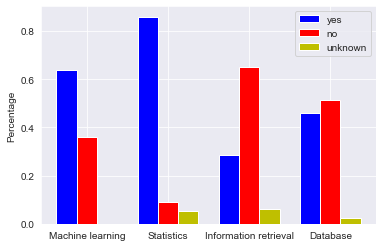

In [20]:
sns.set_style('darkgrid')
barWidth=0.25
r1 = np.arange(len(yeslist))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
plt.bar(r1, yeslist, color='b', width=barWidth, label='yes')
plt.bar(r2, nolist, color='r', width=barWidth, label='no')
plt.bar(r3, unknownlist, color='y', width=barWidth, label='unknown')
plt.xticks([r + barWidth for r in range(len(yeslist))], ['Machine learning','Statistics','Information retrieval','Database'])
plt.ylabel('Percentage')
plt.legend()
plt.show()

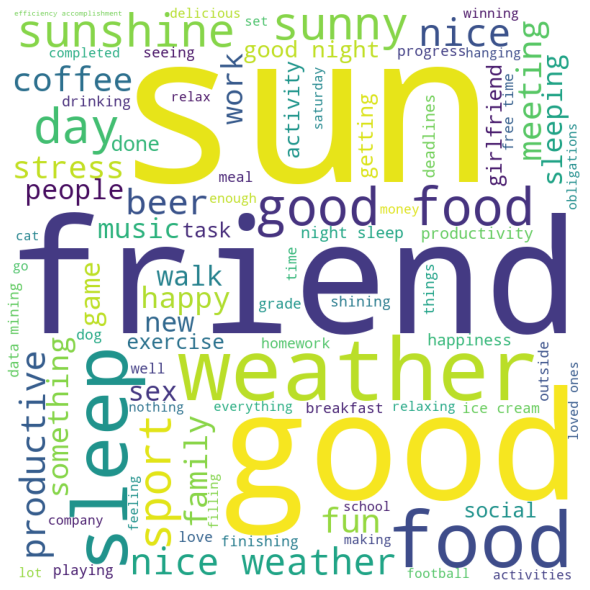

In [15]:
wordlist=[]
for i in range(len(ODI['good1'])):
    wordlist.append(ODI['good1'][i])
    wordlist.append(ODI['good2'][i])

words = ''
stopwords = set(STOPWORDS)
# iterate through the csv file
for val in wordlist:
      
    # typecaste each val to string
    val = str(val)
  
    # split the value
    tokens = val.split()
      
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
      
    words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(words)
  
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

In [16]:
def if_valid_stress(row):
    num = row['stress']
    try:
        num = int(num)
        if 0 <= num <= 100:
            return row
        return None
    except Exception as e:
        try:
            num = float(num)
            if 0 <= num <= 100:
                return row
            return None
        except Exception as e:
            return None

newODI = ODI.apply(lambda x: if_valid_stress(x), axis=1).dropna()

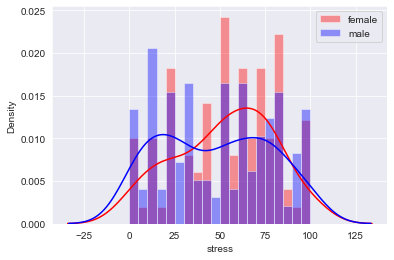

In [19]:
sns.set_palette("hls")
sns.set_style('darkgrid')
sns.distplot(newODI.stress[newODI['gender']=='female'],color="r",bins=20,kde=True,label='female')
sns.distplot(newODI.stress[newODI['gender']=='male'],color="b",bins=20,kde=True,label='male')
plt.ylabel('Density')
plt.legend()
plt.show()

In [21]:
def if_valid_competition(row):
    num = row['competition']
    try:
        num = int(num)
        if 0 <= num <= 100:
            return row
        return None
    except Exception as e:
        try:
            num = float(num)
            if 0 <= num <= 100:
                return row
            return None
        except Exception as e:
            return None

newODI2 = ODI.apply(lambda x: if_valid_competition(x), axis=1).dropna()

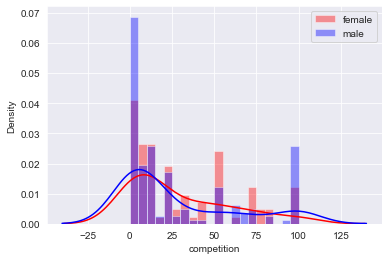

In [22]:
sns.set_palette("hls")
sns.set_style('darkgrid')
sns.distplot(newODI2.competition[newODI2['gender']=='female'],color="r",bins=20,kde=True,label='female')
sns.distplot(newODI2.competition[newODI2['gender']=='male'],color="b",bins=20,kde=True,label='male')
plt.ylabel('Density')
plt.legend()
plt.show()